In [1]:
# general imports 
import os
from pathlib import Path
import hdmf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import pickle
# nwb specific imports 
import pynwb
from nwbwidgets import nwb2widget
from hdmf_zarr import NWBZarrIO 

In [2]:
# set data path
import sys
import platform
from os.path import join as pjoin

platstring = platform.platform()
system = platform.system()
if system == "Darwin":
    # macOS
    data_dir = "/Volumes/Brain2025/"
elif system == "Windows":
    # Windows (replace with the drive letter of USB drive)
    data_dir = "E:/"
elif "amzn" in platstring:
    # then on CodeOcean
    data_dir = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_dir = "/media/$USERNAME/Brain2025/"
    
print('data directory set to', data_dir)

data directory set to /data/


In [3]:
# Load metadata CSV
def load_metadata(df_path:str):
    
    metadata = pd.read_csv('/data/metadata/npultra_metadata.csv', index_col = False)
    return data

In [4]:
# dont't need project_name
# don't need date of birth, session date, session of time 
metadata = pd.read_csv('/data/metadata/npultra_metadata.csv', index_col = False)

In [5]:
metadata

,project_name,_id,name,subject_id,genotype,date_of_birth,sex,modality,session_date,age,session_time,session_type,stimulus_epochs,stimulus_types,notes
0,NP Ultra and Psychedelics,916393f2-7009-421a-bde7-bbaf95416937,ecephys_714527_2024-05-14_13-22-07_nwb_2025-08...,714527,Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,2023-11-30,Female,Extracellular electrophysiology,2024-05-14,166,10:25:34.114677,saline,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Saline injection occurred ~5 min after this ...
1,NP Ultra and Psychedelics,8a00ee0c-c470-43c5-b24c-52c1785bee3c,ecephys_714527_2024-05-15_13-00-23_nwb_2025-08...,714527,Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,2023-11-30,Female,Extracellular electrophysiology,2024-05-15,167,10:43:35.535979,psilocybin,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Psilocybin injection (3 mg/kg) occurred ~1 m...
2,NP Ultra and Psychedelics,c867ad1e-bd84-42df-b863-1244a2fcc957,ecephys_714789_2024-05-16_13-16-59_nwb_2025-08...,714789,Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,2023-12-01,Female,Extracellular electrophysiology,2024-05-16,167,10:26:41.826355,saline,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Saline injection occured ~1 min after this s...
3,NP Ultra and Psychedelics,48c07938-c41b-4cd6-b9e6-c25c0a90aedb,ecephys_714789_2024-05-17_11-47-07_nwb_2025-08...,714789,Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,2023-12-01,Female,Extracellular electrophysiology,2024-05-17,168,09:26:22.868269,psilocybin,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Psilocybin injection (3 mg/kg) occurred ~1 m...
4,NP Ultra and Psychedelics,f6792a6f-e70b-4d42-b0b0-9007adc65775,ecephys_717033_2024-06-04_13-01-40_nwb_2025-08...,717033,Tlx3-Cre_PL56/wt;Ai167(TIT2L-ChrimsonR-tdT-ICL...,2023-12-18,Male,Extracellular electrophysiology,2024-06-04,169,10:11:23.881625,saline,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Saline injection occurred ~1 minute after th...
5,NP Ultra and Psychedelics,fa1023d7-2d57-4d3a-86b6-197f098adc08,ecephys_717033_2024-06-05_12-36-57_nwb_2025-08...,717033,Tlx3-Cre_PL56/wt;Ai167(TIT2L-ChrimsonR-tdT-ICL...,2023-12-18,Male,Extracellular electrophysiology,2024-06-05,170,10:20:21.656058,psilocybin,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Psilocybin injection (3 mg/kg) occurred ~1 m...
6,NP Ultra and Psychedelics,e50ee957-79a9-41f8-8d81-82e7a2b88a20,ecephys_717036_2024-06-06_12-32-42_nwb_2025-08...,717036,Tlx3-Cre_PL56/wt;Ai167(TIT2L-ChrimsonR-tdT-ICL...,2023-12-18,Female,Extracellular electrophysiology,2024-06-06,171,09:42:55.233315,saline,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Saline injection occurred ~1 minute after th...
7,NP Ultra and Psychedelics,479dabb8-1886-4e8a-b6f3-a1d66ada8999,ecephys_717036_2024-06-07_12-00-57_nwb_2025-08...,717036,Tlx3-Cre_PL56/wt;Ai167(TIT2L-ChrimsonR-tdT-ICL...,2023-12-18,Female,Extracellular electrophysiology,2024-06-07,172,09:44:57.840625,psilocybin,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Psilocybin injection (3 mg/kg) occurred ~ 1 ...
8,NP Ultra and Psychedelics,8ed4d34f-1af5-4c03-9e2b-4384a9d8133a,ecephys_729461_2024-06-10_12-51-54_nwb_2025-08...,729461,Tlx3-Cre_PL56/wt;Ai167(TIT2L-ChrimsonR-tdT-ICL...,2024-03-06,Male,Extracellular electrophysiology,2024-06-10,96,09:57:49.515589,saline,"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...",['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...,['Saline injection occurred ~1 minute after th...
9,NP Ultra and Psychedelics,31544076-dffe-4d5e-a1f8-9afb0a9a3363,ecephys_729461_2024-06-11_12-30-16_nwb_2025-08...,729461,Tlx3-Cre_PL56/wt;Ai167(

In [6]:
# Select psilocybin sessions 
filtered_metadata = metadata[metadata.session_type == 'saline']

# Get the asset name 
session_name = filtered_metadata['name'].iloc[0]

# Find the filepath 
data_dir = os.path.join(r'/data/np-ultra-psychedelics/', session_name)
nwb_path_zarr = list(Path(data_dir).glob("*.nwb"))[0]

print('Found filepath:', nwb_path_zarr) 


Found filepath: /data/np-ultra-psychedelics/ecephys_714527_2024-05-14_13-22-07_nwb_2025-08-03_21-11-22/ecephys_714527_2024-05-14_13-22-07_experiment1_recording1.nwb


In [7]:
# Select psilocybin sessions 
filtered_metadata = metadata[metadata.session_type == 'psilocybin']

# Get the asset name 
session_name = filtered_metadata['name'].iloc[0]

# Find the filepath 
data_dir = os.path.join(r'/data/np-ultra-psychedelics/', session_name)
nwb_path_zarr = list(Path(data_dir).glob("*.nwb"))[0]

print('Found filepath:', nwb_path_zarr) 


Found filepath: /data/np-ultra-psychedelics/ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22/ecephys_714527_2024-05-15_13-00-23_experiment1_recording1.nwb


In [8]:
# Select psilocybin sessions 
filtered_metadata = metadata[metadata.session_type == 'psilocybin']

# Get the asset name 
session_name = filtered_metadata['name'].iloc[0]

# Find the filepath 
data_dir = os.path.join(r'/data/np-ultra-psychedelics/', session_name)
nwb_path_zarr = list(Path(data_dir).glob("*.nwb"))[0]

print('Found filepath:', nwb_path_zarr) 

Found filepath: /data/np-ultra-psychedelics/ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22/ecephys_714527_2024-05-15_13-00-23_experiment1_recording1.nwb


In [9]:
# Select psilocybin sessions 
filtered_metadata = metadata[metadata.session_type == 'psilocybin']

# Get the asset name 
session_name = filtered_metadata['name'].iloc[0]

# Find the filepath 
data_dir = os.path.join(r'/data/np-ultra-psychedelics/', session_name)
nwb_path_zarr = list(Path(data_dir).glob("*.nwb"))[0]

print('Found filepath:', nwb_path_zarr) 

Found filepath: /data/np-ultra-psychedelics/ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22/ecephys_714527_2024-05-15_13-00-23_experiment1_recording1.nwb


# Util funtions template

In [ ]:
##### extract relevent data for processing
save_path = '/scratch/'
io = NWBZarrIO(nwb_path_zarr, mode = 'r') 
nwbfile_zarr = io.read()
df_analysis = nwbfile_zarr.analysis['analysis_table'].to_dataframe()
df_units = nwbfile_zarr.units.to_dataframe()
df_units['probe'] = df_units['device_name'].apply(lambda x: x.split('Probe')[1])
df_units = df_units[['ks_unit_id','probe','depth','estimated_x','estimated_y','estimated_z']]
df_units['ks_unit_id'] = [int(i) for i in df_units['ks_unit_id']]
df_data = df_analysis.merge(df_units,on = ['ks_unit_id','probe'])
df_data = df_data.sort_values(by=['region', 'layer'])
#df_data.to_csv(os.path.join(save_path,'data.csv'))
df_data.to_pickle(os.path.join(save_path,'data.pkl'))
df_epochs = nwbfile_zarr.stimulus['epochs'].to_dataframe()
df_photostim = nwbfile_zarr.stimulus['photostim'].to_dataframe()
df_visualstim = nwbfile_zarr.stimulus['visualstim'].to_dataframe()
#df_photostim.to_csv(os.path.join(save_path,'photostim.csv'))
#df_epochs.to_csv(os.path.join(save_path,'epochs.csv'))
#df_visualstim.to_csv(os.path.join(save_path,'visualstim.csv'))

In [85]:
#!pip install pyarrow add the enviromnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 MB 56.6 MB/s eta 0:00:0000:0100:01


In [88]:
df_data.to_pickle(os.path.join(save_path,'data.pkl'))
df_epochs.to_pickle(os.path.join(save_path,'epochs.pkl'))
df_photostim.to_pickle(os.path.join(save_path,'photostim.pkl'))
df_visualstim.to_pickle(os.path.join(save_path,'visualstim.pkl'))

In [275]:
epoch = 'Spontaneous_0'
epoch_col_name = f'{epoch}_spikes'
start_time = df_epochs[df_epochs['stim_name'] == epoch]['start_time'][0]
stop_time = df_epochs[df_epochs['stim_name'] == epoch]['stop_time'][0]


In [276]:
import numpy as np

def bin_spikes(spike_times, end_time, bin_size):
  """
  Bins spike events into a time series.

  Args:
    spike_times: A 1D numpy array of spike timestamps.
    end_time: The end time of the recording.
    bin_size: The desired time bin size.

  Returns:
    A tuple containing:
      - binned_spikes: A 1D numpy array where each element is the count of spikes in the corresponding time bin.
      - bin_centers: A 1D numpy array of the center timestamp for each bin.
  """
  # Create the time bins
  bins = np.arange(0, end_time + bin_size, bin_size)

  # Use numpy.histogram to count the spikes in each bin
  binned_spikes, bin_edges = np.histogram(spike_times, bins=bins)

  # Calculate the center of each bin
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

  return binned_spikes, bin_centers
'''
# Example Usage:
# Given spike times
# Example Usage:
# Given spike times (using a more populated example to show counts)
spike_times = np.array([10, 25, 80, 110, 150, 190, 220, 280, 350])

# Define the end time of the recording and the desired bin size
end_time = 400.0
bin_size = 100.0

# Call the function to get the binned spike counts and their timestamps (centers)
binned_spike_counts, bin_centers = bin_spikes(spike_times, end_time, bin_size)

# The new time series of spike counts
print("Binned Spike Counts:", binned_spike_counts)

# The timestamps (centers) for each bin
print("Bin Center Timestamps:", bin_centers)

# Example output from the print statements:
# Binned Spike Counts: [3 3 2 1]
'''
#location of minmum 
# minimum wav
# different cell types and where they are 
# width of the ap (interneuron)
# exception AP ampkitude burst of spikes shape 
# amplitudew
fig, axes = plt.subplots(nrows=192, ncols=2, figsize=(1, 30), 
                         constrained_layout=False)

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(average_waveforms[i], linewidth=0.5)
    ax.axis("off")  # remove axes, ticks, labels

plt.subplots_adjust(wspace=0, hspace=0)  # minimize gaps
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 50), 
                         constrained_layout=False)
axes[0].imshow(average_waveforms[:192,:],cmap='jet')
axes[1].imshow(average_waveforms[192:,:],cmap='jet')
#axes[0].axis('off')
#axes[1].axis('off')
# Remove y axis, keep x axis
for ax in axes:
    ax.get_yaxis().set_visible(False)   # hide y axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)  # keep x ticks




'\n# Example Usage:\n# Given spike times\n# Example Usage:\n# Given spike times (using a more populated example to show counts)\nspike_times = np.array([10, 25, 80, 110, 150, 190, 220, 280, 350])\n\n# Define the end time of the recording and the desired bin size\nend_time = 400.0\nbin_size = 100.0\n\n# Call the function to get the binned spike counts and their timestamps (centers)\nbinned_spike_counts, bin_centers = bin_spikes(spike_times, end_time, bin_size)\n\n# The new time series of spike counts\nprint("Binned Spike Counts:", binned_spike_counts)\n\n# The timestamps (centers) for each bin\nprint("Bin Center Timestamps:", bin_centers)\n\n# Example output from the print statements:\n# Binned Spike Counts: [3 3 2 1]\n'

In [279]:
binned_results = df_data.apply(
    lambda row: bin_spikes(row['Spontaneous_0_spikes'],stop_time,0.5),
    axis=1,
    result_type='expand'
)

In [281]:
binned_results.columns = ['binned_counts', 'bin_centers']
df_with_apply = df_data.join(binned_results)


In [282]:
df_with_apply['layer']

0             MOs5
1             MOs5
2             MOs5
3             MOs5
4             MOs5
           ...    
1436      SSp-bfd5
1437      SSp-bfd4
1438    SSp-bfd2/3
1439    SSp-bfd2/3
1440      SSp-bfd5
Name: layer, Length: 1441, dtype: object

In [283]:
df_with_apply['region']

0       MOs
1       MOs
2       MOs
3       MOs
4       MOs
       ... 
1436    SSp
1437    SSp
1438    SSp
1439    SSp
1440    SSp
Name: region, Length: 1441, dtype: object

In [284]:
df_sorted = df_with_apply.sort_values(by=['region', 'layer'])


In [285]:
df_sorted.head()

,ks_unit_id,probe,probe_type,Spontaneous_0_spikes,Spontaneous_1_spikes,Spontaneous_2_spikes,Spontaneous_3_spikes,Spontaneous_4_spikes,RFMapping_0_spikes,RFMapping_1_spikes,...,burst_idx,num_bursts,burst_dur,burst_proportion,depth,estimated_x,estimated_y,estimated_z,binned_counts,bin_centers
98,29,A,Neuropixels Ultra (Switchable),"[42.66353488307739, 44.84749913959786, 44.9435...","[2846.634440519329, 2848.186972139343, 2849.37...","[5522.633187381158, 5522.689187319358, 5522.69...",NaN,NaN,"[1253.6586984713745, 1255.1919634459837, 1255....","[4058.9480359859845, 4061.242333454078, 4061.6...",...,0.001878,40,0.004615,0.005728,715.58,4.88,715.58,31.95,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.7..."
99,29,A,Neuropixels Ultra (Switchable),"[42.66353488307739, 44.84749913959786, 44.9435...","[2846.634440519329, 2848.186972139343, 2849.37...","[5522.633187381158, 5522.689187319358, 5522.69...",NaN,NaN,"[1253.6586984713745, 1255.1919634459837, 1255....","[4058.9480359859845, 4061.242333454078, 4061.6...",...,0.001878,40,0.004615,0.005728,721.39,43.87,721.39,5.98,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.7..."
100,29,A,Neuropixels Ultra (Switchable),"[42.66353488307739, 44.84749913959786, 44.9435...","[2846.634440519329, 2848.186972139343, 2849.37...","[5522.633187381158, 5522.689187319358, 5522.69...",NaN,NaN,"[1253.6586984713745, 1255.1919634459837, 1255....","[4058.9480359859845, 4061.242333454078, 4061.6...",...,0.001878,40,0.004615,0.005728,622.80,41.16,622.80,42.37,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.7..."
105,31,A,Neuropixels Ultra (Switchable),[],[],"[5522.5465541434305, 5522.682253993677, 5537.3...",NaN,NaN,[],"[4287.0068843082545, 4306.223529768106, 4492.7...",...,0.000000,0,NaN,0.000000,722.58,29.18,722.58,9.57,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.7..."
106,31,A,Neuropixels Ultra (Switchable),[],[],"[5522.5465541434305, 5522.682253993677, 5537.3...",NaN,NaN,[],"[4287.0068843082545, 4306.223529768106, 4492.7...",...,0.000000,0,NaN,0.000000,707.98,50.04,707.98,8.28,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.7..."


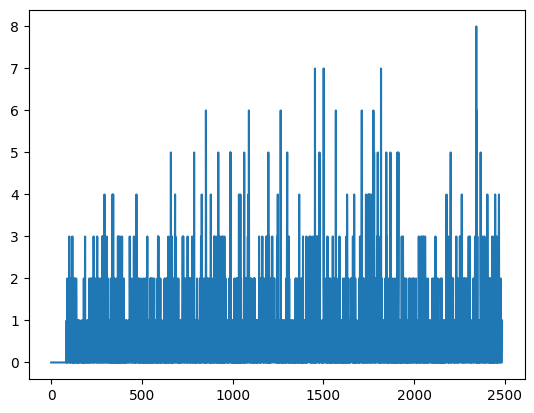

In [286]:
plt.plot(df_sorted.iloc[0]['binned_counts'])

In [290]:
def draw_bracket(ax, y_start, y_end, x_pos, text, text_offset=0.2, tick_size=0.02):
    """
    Draws a vertical bracket with a label on a Matplotlib axes.
    
    Args:
        ax: The axes to draw on.
        y_start, y_end: The starting and ending row indices for the bracket.
        x_pos: The horizontal position of the bracket line (in data coordinates).
        text: The label for the bracket.
        text_offset: How far from the bracket to place the text.
        tick_size: The length of the horizontal ticks on the bracket ends.
    """
    # The heatmap plots rows with centers at 0.5, 1.5, 2.5, ...
    # The bracket should span from the top of the first cell to the bottom of the last.
    bracket_y_start = y_start 
    bracket_y_end = y_end + 1
    
    # Draw the main vertical line
    ax.plot([x_pos, x_pos], [bracket_y_start, bracket_y_end], color='black', lw=1.5)
    
    # Draw the top and bottom ticks
    ax.plot([x_pos, x_pos - tick_size], [bracket_y_start, bracket_y_start], color='black', lw=1.5)
    ax.plot([x_pos, x_pos - tick_size], [bracket_y_end, bracket_y_end], color='black', lw=1.5)
    
    # Add the text label
    text_y = (bracket_y_start + bracket_y_end) / 2
    ax.text(x_pos - text_offset, text_y, text, 
            ha='right', va='center', fontsize=12, rotation=90)

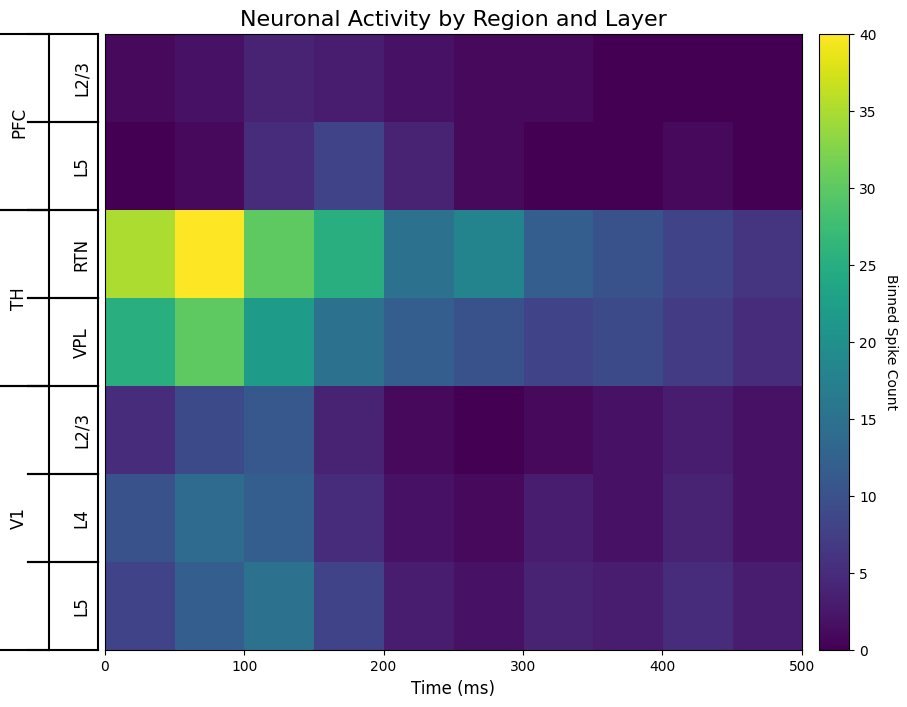

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. Sample Data (assuming a consistent binning process) ---
# For a continuous x-axis, we need bin_centers from your binning function.
# Let's assume a bin_size of 50ms and an end_time that results in 10 bins.
bin_size = 50.0
bin_centers = np.arange(25, 525, bin_size) # e.g., centers at 25, 75, 125, ...

data = {
    'region': ['PFC', 'PFC', 'TH', 'TH', 'V1', 'V1', 'V1'],
    'layer': ['L2/3', 'L5', 'RTN', 'VPL', 'L2/3', 'L4', 'L5'],
    'binned_counts': [
        np.array([1, 2, 4, 3, 2, 1, 1, 0, 0, 0]),
        np.array([0, 1, 5, 8, 4, 1, 0, 0, 1, 0]),
        np.array([35, 40, 30, 25, 15, 18, 12, 10, 8, 6]),
        np.array([25, 30, 22, 15, 12, 10, 8, 9, 7, 5]),
        np.array([5, 9, 11, 4, 1, 0, 1, 2, 3, 2]),
        np.array([10, 14, 12, 5, 2, 1, 3, 2, 4, 2]),
        np.array([8, 12, 15, 8, 3, 2, 4, 3, 5, 3])
    ]
}
df = pd.DataFrame(data).sort_values(by=['region', 'layer']).reset_index(drop=True)
heatmap_data = np.stack(df['binned_counts'].values)

# --- 2. Updated Helper Function to Draw Brackets ---
def draw_bracket(ax, y_start, y_end, x_pos, text, text_offset=0.02, tick_size=0.2):
    """Draws a vertical bracket with a label on a Matplotlib axes."""
    # The bracket should span from the top edge of the first cell
    # to the bottom edge of the last cell.
    bracket_y_start = y_start - 0.5
    bracket_y_end = y_end + 0.5

    # Use Axis coordinates (0-1) for x positioning to avoid overlap
    # This makes positioning independent of the data's x-axis values
    x_pos_trans = ax.get_yaxis_transform().transform((x_pos, 0))[0]

    # Main vertical line
    ax.plot([x_pos, x_pos], [bracket_y_start, bracket_y_end], color='black', lw=1.5,
            transform=ax.get_yaxis_transform(), clip_on=False)
    # Top tick
    ax.plot([x_pos, x_pos - tick_size], [bracket_y_start, bracket_y_start], color='black', lw=1.5,
            transform=ax.get_yaxis_transform(), clip_on=False)
    # Bottom tick
    ax.plot([x_pos, x_pos - tick_size], [bracket_y_end, bracket_y_end], color='black', lw=1.5,
            transform=ax.get_yaxis_transform(), clip_on=False)
    # Text label
    text_y = (bracket_y_start + bracket_y_end) / 2
    ax.text(x_pos - text_offset, text_y, text,
            ha='right', va='center', fontsize=12, rotation=90,
            transform=ax.get_yaxis_transform())


# --- 3. Create the Plot using imshow for a Continuous X-Axis ---
fig, ax = plt.subplots(figsize=(12, 8))

# Define the extent of the image for the continuous x-axis
# [x_start, x_end, y_start, y_end]
# The x-axis will now correctly represent time.
extent = [
    bin_centers[0] - bin_size/2,  # Left edge of the first bin
    bin_centers[-1] + bin_size/2, # Right edge of the last bin
    heatmap_data.shape[0] - 0.5,  # Bottom edge of heatmap
    -0.5                          # Top edge of heatmap
]

# Use imshow for better control
im = ax.imshow(heatmap_data, aspect='auto', cmap='viridis', extent=extent)

# Add a color bar
cbar = fig.colorbar(im, ax=ax, pad=0.02)
cbar.set_label('Binned Spike Count', rotation=270, labelpad=15)

# --- 4. Draw Brackets (with improved positioning) ---
# Loop through the primary group (region)
for region_name, region_group in df.groupby('region', sort=False):
    region_start_idx = region_group.index.min()
    region_end_idx = region_group.index.max()
    # Draw outer bracket for the region
    draw_bracket(ax, region_start_idx, region_end_idx, -0.08, region_name, text_offset=0.03)

    # Loop through the secondary group (layer)
    for layer_name, layer_group in region_group.groupby('layer', sort=False):
        layer_start_idx = layer_group.index.min()
        layer_end_idx = layer_group.index.max()
        # Draw inner bracket for the layer
        draw_bracket(ax, layer_start_idx, layer_end_idx, -0.01, layer_name, text_offset=0.01, tick_size=0.1)

# --- 5. Final Touches ---
ax.set_title('Neuronal Activity by Region and Layer', fontsize=16)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('')  # Y-axis is now described by brackets
ax.set_yticks([]) # Hide the default y-ticks

# Adjust the left margin to ensure brackets and labels are visible
plt.subplots_adjust(left=0.2)
plt.show()